## Problem: N-Queens

The n-queens puzzle is the problem of placing `n` queens on an `n x n` chessboard such that no two queens attack each other.

Given an integer `n`, return all *distinct solutions* to the n-queens puzzle. You may return the answer in any order.

Each solution contains a distinct board configuration of the n-queens' placement, where `Q` and `.` both indicate a queen and an empty space, respectively.

*Example:*

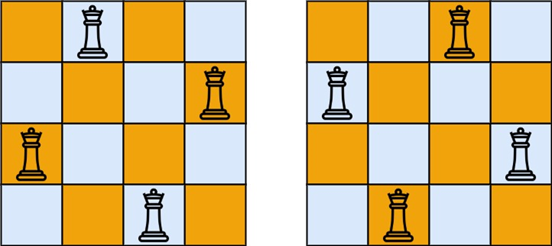

```
Input: n = 4
Output: [[".Q..","...Q","Q...","..Q."],["..Q.","Q...","...Q",".Q.."]]
Explanation: There exist two distinct solutions to the 4-queens puzzle as shown above
```

my code works, but is unfortunately too slow :( This is using recursion + memoization

1. DP with memoization is usually faster than pure backtracking for problems with overlapping subproblems.
2. For the N-Queens problem specifically, backtracking is often more efficient. Here's why:
    - Limited overlapping subproblems: The N-Queens problem doesn't have many overlapping subproblems, which reduces the benefit of memoization.
    - Early pruning: Backtracking can eliminate invalid board states early, avoiding unnecessary computations.
    - Memory usage: DP with memoization stores all intermediate results, which can be memory-intensive for large N.
    - State representation: The state space for N-Queens is large, making it challenging to effectively memoize all states.

In [101]:
#mysol
#merge i and n arguments into a single argument


from functools import lru_cache, cache
import copy
class Solution:
    def solveNQueens(self, n: int):
        empty=tuple(('.',)*n for _ in range(n))
        all=self.dfs(0,n,empty)
        #convert all the xs to dots
        l=[[s.replace('x', '.') for s in board] for board in all]

        return l
    
    @lru_cache(None)
    def dfs(self,i,n,state):
        '''
        tries to add a queen recursively
        return the board

        state here is always a tuple of strings, so that we can cache stuff
        '''
        #successfully placed n queens
        if i==n:
            #print('found a board',state)
            return set((tuple(''.join(row) for row in state),))

        #list of board states
        res=set()

        for row in range(n):
            for col in range(n):
                if state[row][col]=='.':
                    #print('going to add',i+1,'queen, at position',row,col)
                    #print('before adding',i+1, 'queen',state)
                    board=self.mark((row,col),n, state)
                    if board!=False:
                        #concat this sol
                        res=res.union(self.dfs(i+1,n,board))
                    #make the other squares unavailable:
        return res

    def mark(self,position,n,state):
        '''
        I want to place a new queen at `position` (i,j)
        Mark all the relevant squares as attacked, and return the new state
        If I attack any other queens, this is not possible, then return False

        state is represented as a tuple of strings. convert to a list of lists, manipulate, then return as a tuple of strings.

        Queens are represented with 'Q'
        Empty spaces are represented with '.'
        Attacked spaces are represented with 'x'
        '''
        i,j=position

        #convert to a list of lists for manipulation
        state=[list(string) for string in state]

        #mark attacked positions
        for row in range(n):
            for col in range(n):
                
                #first check is to mark horizontally
                #second check is to mark vertically
                #The third check is to see if the elem lies on \ diagonal. we first offset both patches to the patch (0,0) and compare along the long diagonal like identity matrix
                #fourth check is to see if elem lies on / diagonal
                if (row==i or 
                    col==j or
                    row-i==col-j or
                    i-row==col-j):
                    if state[row][col]=='Q':
                        return False
                    state[row][col]='x'

        #mark the queen
        state[i][j]='Q'

        #convert back to a tuple of strings
        return tuple(''.join(inner) for inner in state)


sol=Solution()
print(sol.solveNQueens(9))
#print(sol.mark((0,0),4,[['.', '.', '.', '.'], ['.', '.', '.', '.'], ['.', '.', '.', '.'], ['.', '.', '.', '.']]))

[['....Q....', '......Q..', '.Q.......', '.....Q...', '..Q......', 'Q........', '.......Q.', '...Q.....', '........Q'], ['...Q.....', '.....Q...', 'Q........', '....Q....', '.Q.......', '.......Q.', '..Q......', '......Q..', '........Q'], ['...Q.....', '......Q..', '........Q', '.....Q...', '..Q......', 'Q........', '.......Q.', '....Q....', '.Q.......'], ['...Q.....', '.....Q...', '..Q......', '........Q', '.Q.......', '.......Q.', '....Q....', '......Q..', 'Q........'], ['......Q..', '........Q', '...Q.....', '.Q.......', '....Q....', '.......Q.', '.....Q...', 'Q........', '..Q......'], ['..Q......', '.......Q.', '.Q.......', '...Q.....', '........Q', '......Q..', '....Q....', 'Q........', '.....Q...'], ['..Q......', '........Q', '...Q.....', '.......Q.', '....Q....', '.Q.......', '.....Q...', 'Q........', '......Q..'], ['.......Q.', '...Q.....', '......Q..', '........Q', '.Q.......', '.....Q...', 'Q........', '..Q......', '....Q....'], ['........Q', '.....Q...', '...Q.....', '......

Backtracking implementation
- everytime we place a queen, we always do it on a new row
  - update the forbidden columns, \ diagonals and / diagonals

In [ ]:
class Solution:
    def solveNQueens(self, n: int):
        #these 3 sets are the only information we need!
        #these basically contain information about our 'forbidden' patches
        col = set()
        posDiag = set()
        negDiag = set()

        res = []
        board = [["."] * n for i in range(n)]

        #backtrack over the rows
        def backtrack(r):
            #we have placed n queens
            if r == n:
                #create a copy of the board
                copy = ["".join(row) for row in board]
                res.append(copy)
                return

            #iterate over the columns
            for c in range(n):
                #cannot add the queen here
                if c in col or (r + c) in posDiag or (r - c) in negDiag:
                    continue

                #if we do choose to add the queen at r,c then
                
                #add to the forbidden columns
                col.add(c)
                #along a / diagonal, row+col is a constant value - similar to row==-col
                posDiag.add(r + c)
                #along a \ diagonal, row-col is a constant value - similar to row==col
                negDiag.add(r - c)

                #update our board. Our board only contains Q and .
                board[r][c] = "Q"

                #backtrack to a new row!
                backtrack(r + 1)

                #start reversing/backtracking
                #this is important as board is updated in real time, to allow for other paths to explore
                col.remove(c)
                posDiag.remove(r + c)
                negDiag.remove(r - c)
                board[r][c] = "."

        backtrack(0)
        return res


## Problem: Letter Combinations of Phone Numbers

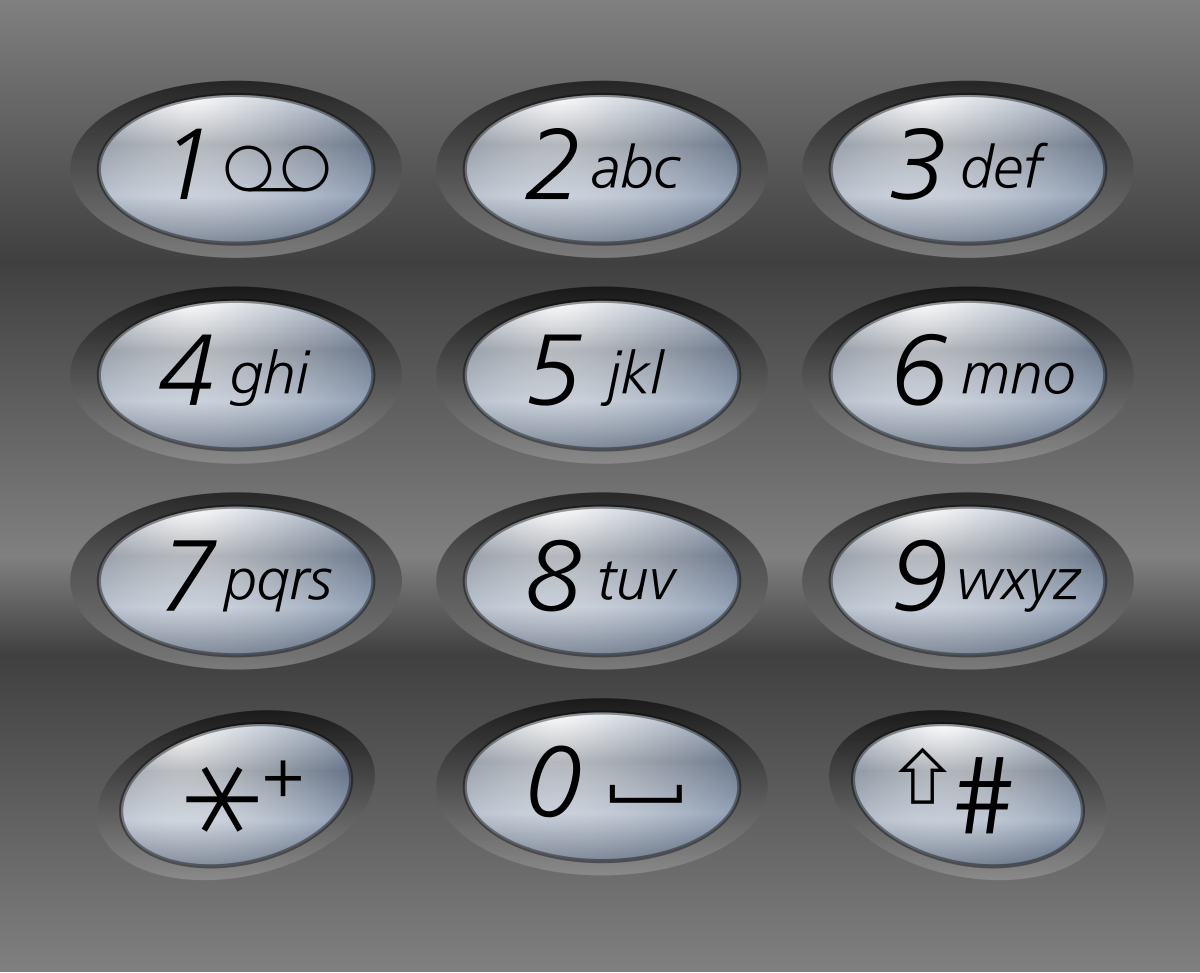

```
Example 1:

Input: digits = "23"
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]
Example 2:

Input: digits = ""
Output: []
Example 3:

Input: digits = "2"
Output: ["a","b","c"]
```

In [ ]:
#pure iterative solution
def letterCombinations(digits: str) -> List[str]:
    m = {
        '2': ['a', 'b', 'c'],
        '3': ['d', 'e', 'f'],
        '4': ['g', 'h', 'i'],
        '5': ['j', 'k', 'l'],
        '6': ['m', 'n', 'o'],
        '7': ['p', 'q', 'r', 's'],
        '8': ['t', 'u', 'v'],
        '9': ['w', 'x', 'y', 'z'],
    }
    if len(digits) == 0:
        return []
    prev = m[digits[0]]
    curr = []
    for i in range(1, len(digits)):
        cs = m[digits[i]]
        for p in prev:
            for val in cs:
                curr.append(p + val)
        #this resetting is CORE
        prev = curr
        curr = []
    return prev

## Word Search

The backtracking component is key! To do backtracking, we keep a `visited` set, but it is crucial to both add a patch when we visit it and also remove the patch from `visited` when we backtrack.

Given an `m x n` grid of characters board and a string word, return `true` if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

> Note that we need a `visited` tracker, as we cannot repeat patches

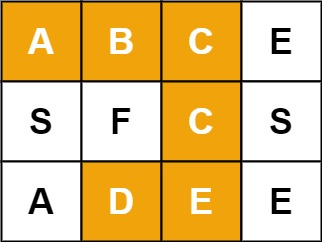

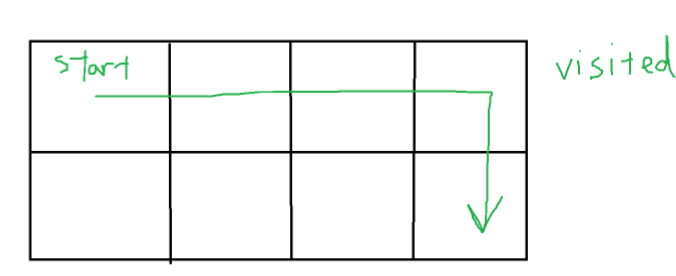

Suppose we go all the way right then down. All these patches have been added to `visited`. 

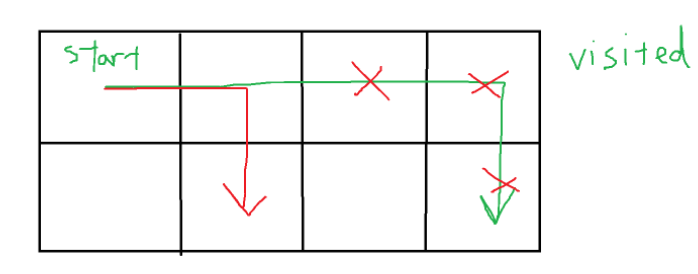

At some point later, we want to take a different path in red. we **must remove these extra patches** from `visited` to allow exploration of these patches in the new path! If we don't, these extra patches are already added to `visited`, which will prevent exploration of these patches later on.

### Two ways of solving the `visited` updating problem

1. Like current implementation, make `visited` a single shared object, and update it in place as we explore/backtrack
2. Make a new copy of `visited` each time you recurse, so it's not modified globally. No need to manage with `add` and `remove`
    - however this method takes alot of time copying, and also is very memory poor!

In [ ]:
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        height=len(board)
        width=len(board[0])
        
        def helper(start, visited, remain):
            x, y = start

            if remain == "":
                return 1

            if x >= width or y >= height or x < 0 or y < 0 or (x, y) in visited:
                return 0

            if board[y][x] != remain[0]:
                return 0

            visited.add((x,y))
            count = (helper((x,y-1), visited, remain[1:]) or
                    helper((x+1,y), visited, remain[1:]) or
                    helper((x,y+1), visited, remain[1:]) or
                    helper((x-1,y), visited, remain[1:]))
            #this line is SUPER IMPORTANT
            visited.remove((x,y))  # Remove the position when backtracking
            return count

        total_count = 0
        for start_x in range(width):
            for start_y in range(height):
                total_count += helper((start_x,start_y), set(), word)  # New set for each starting point

        return total_count > 0

In [ ]:
class Solution:
    def exist(self, board, word):
        def backtrack(i, j, k):
            #checking if success first, note that success will go one out of bounds
            if k == len(word):
                return True
            #checking if out of bounds, or incorrect word
            if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or board[i][j] != word[k]:
                return False
            
            temp = board[i][j]
            #no character ever matches this, so this is an invalid solution!
            board[i][j] = ''
            
            #increment word by one
            if backtrack(i+1, j, k+1) or backtrack(i-1, j, k+1) or backtrack(i, j+1, k+1) or backtrack(i, j-1, k+1):
                return True
            
            #make this board available to 
            board[i][j] = temp
            return False
        
        for i in range(len(board)):
            for j in range(len(board[0])):
                if backtrack(i, j, 0):
                    return True
        return False